In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import time
import datetime
import plotly  
import plotly.express as px
from datetime import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb

In [2]:
data = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/模型使用表格.csv')
data = data.iloc[:,1:]
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,-1.122633
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484


In [6]:
data['dif'] = data['sum_by_month'].diff()
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,-1.122633,NaN
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868,-3809.0
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868,188.0
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868,1174.0
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710,9950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382,11609.0
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382,-3246.0
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382,5815.0
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484,-5073.0


In [7]:
data = data.iloc[1:,:]
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868,-3809.0
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868,188.0
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868,1174.0
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710,9950.0
5,2012M08,23374,136296,15,90.97,114.47,23000,27271908,7485408,109.12,...,2012/8/1,34893,0,-0.157423,1.700938,0.229577,-1.509501,1.527557,-0.550710,-11519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382,11609.0
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382,-3246.0
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382,5815.0
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484,-5073.0


In [8]:
w = [0]
w.extend(list(data['疫情'].shift(1)[1:]))
data['疫情last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1032/1967009084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
w = [-1.66830339591676]
w.extend(list(data['income average standard'].shift(1)[1:]))
data['income average last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1032/2847042937.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
w = [-1.12263279793239]
w.extend(list(data['gdp_growth standard'].shift(1)[1:]))
data['gdp_growth standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1032/3126221084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
w = [2.04046807311964]
w.extend(list(data['oil price standard'].shift(1)[1:]))
data['oil price standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1032/1605849105.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
w = [0.954615508614285]
w.extend(list(data['oil price standard'].shift(1)[1:]))
data['trafic index standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1032/4031766162.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
train_data,test_data = data.iloc[:70,:],data.iloc[70:,:]

In [63]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror' ,colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 30, alpha = 10, n_estimators = 9000)

In [64]:
xg_reg.fit(train_data.loc[:,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']],
          train_data.iloc[:,1])

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=9000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [65]:
train_data.iloc[:,1]

1     23581
2     23769
3     24943
4     34893
5     23374
      ...  
66    25515
67    29769
68    31437
69    34316
70    38926
Name: sum_by_month, Length: 70, dtype: int64

In [66]:
ans = xg_reg.predict(test_data.loc[:,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']])

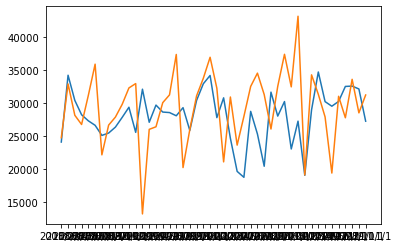

In [67]:
plt.plot(data['time'][70:],ans)
plt.plot(data['time'][70:],data['sum_by_month'][70:])

In [95]:
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif,疫情last_month,income average last_month,gdp_growth standard last_month,oil price standard last_month,trafic index standard last_month
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0.802280,-1.836515,1.541531,-1.148868,-3809.0,0.0,-1.668303,-1.122633,2.040468,0.954616
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0.802280,-1.836515,1.259253,-1.148868,188.0,0.0,-1.836515,-1.148868,1.879700,1.879700
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0.802280,-1.836515,0.923872,-1.148868,1174.0,0.0,-1.836515,-1.148868,1.203377,1.203377
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0.229577,-1.509501,1.027281,-0.550710,9950.0,0.0,-1.836515,-1.148868,0.983543,0.983543
5,2012M08,23374,136296,15,90.97,114.47,23000,27271908,7485408,109.12,...,0.229577,-1.509501,1.527557,-0.550710,-11519.0,0.0,-1.509501,-0.550710,1.344196,1.344196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2.512370,1.814795,0.515826,0.598382,11609.0,6011.0,1.523393,2.377113,0.232508,0.232508
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2.512370,1.814795,0.459930,0.598382,-3246.0,835.0,1.814795,0.598382,0.263019,0.263019
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2.512370,1.814795,0.493468,0.598382,5815.0,313.0,1.814795,0.598382,0.103033,0.103033
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,3.085073,2.757327,0.728234,0.855484,-5073.0,233.0,1.814795,0.598382,0.266540,0.266540


In [177]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror' ,colsample_bytree = 0.1, learning_rate = 0.01,
                max_depth = 300, alpha = 40, n_estimators = 9000,gamma = 100)
ans = []
for x in range(70,116):
    train_data = data.loc[:x,['oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情last_month',
                                 'income average last_month',
                                 'trafic index standard last_month']],
    train_data = np.array(train_data)
    train_data = train_data.reshape(-1,6)
    xg_reg.fit(X = train_data,
               y = data.loc[:x,'sum_by_month'])
    s = data.loc[x+1,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情last_month',
                                 'income average last_month',
                                 'trafic index standard last_month']]
    s = np.array(s)
    s = s.reshape(-1,6)
    ans.append(xg_reg.predict(s))

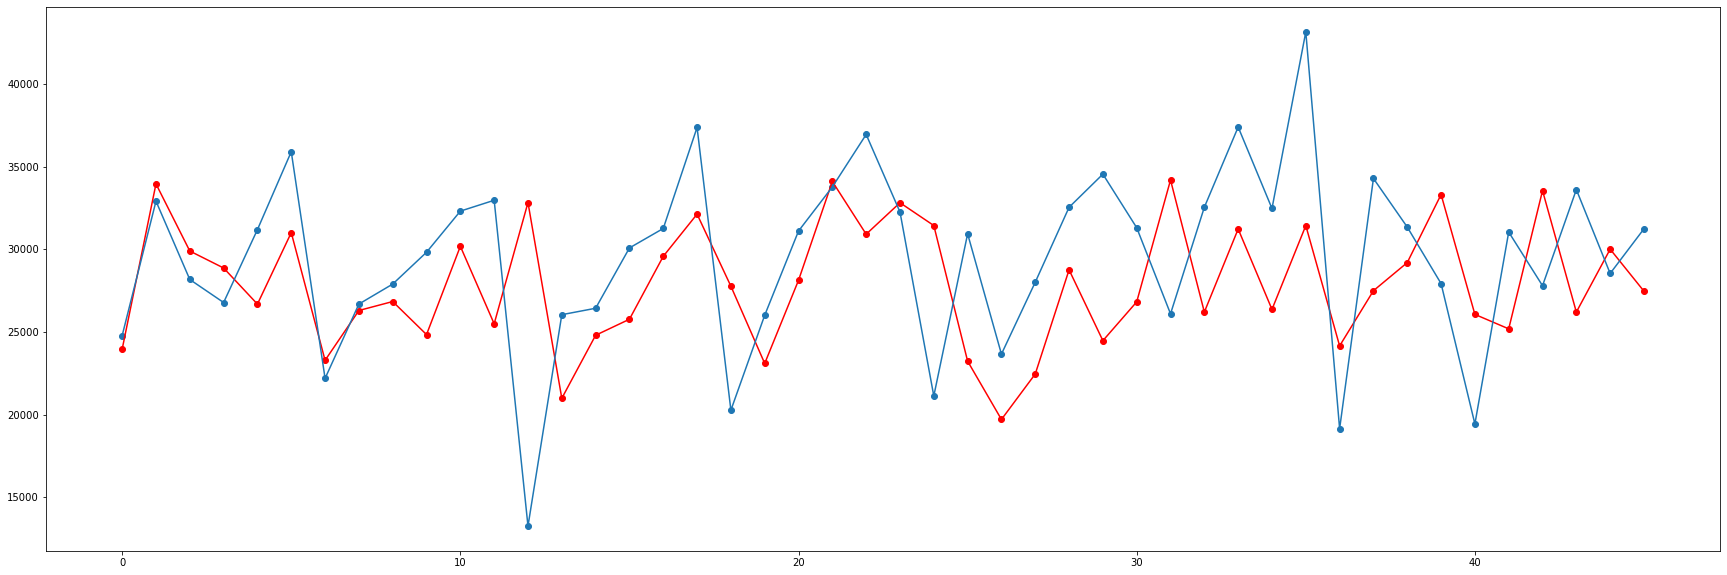

In [178]:
plt.figure(figsize=(30,10))
plt.plot(list(range(0,len(ans))),ans,color = 'r')
plt.scatter(list(range(0,len(ans))),ans,color = 'r')
plt.plot(list(range(0,len(ans))),data['sum_by_month'][70:])
plt.scatter(list(range(0,len(ans))),data['sum_by_month'][70:])

In [150]:
ans_list = []
for x in ans:
    ans_list.append(x[0])
ans_array = np.array(ans_list)
true = np.array(data['sum_by_month'][70:])

In [165]:
np.mean(np.abs((ans_array-true)/true))

0.18597559809304415

In [159]:
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif,疫情last_month,income average last_month,gdp_growth standard last_month,oil price standard last_month,trafic index standard last_month
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0.802280,-1.836515,1.541531,-1.148868,-3809.0,0.0,-1.668303,-1.122633,2.040468,0.954616
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0.802280,-1.836515,1.259253,-1.148868,188.0,0.0,-1.836515,-1.148868,1.879700,1.879700
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0.802280,-1.836515,0.923872,-1.148868,1174.0,0.0,-1.836515,-1.148868,1.203377,1.203377
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0.229577,-1.509501,1.027281,-0.550710,9950.0,0.0,-1.836515,-1.148868,0.983543,0.983543
5,2012M08,23374,136296,15,90.97,114.47,23000,27271908,7485408,109.12,...,0.229577,-1.509501,1.527557,-0.550710,-11519.0,0.0,-1.509501,-0.550710,1.344196,1.344196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2.512370,1.814795,0.515826,0.598382,11609.0,6011.0,1.523393,2.377113,0.232508,0.232508
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2.512370,1.814795,0.459930,0.598382,-3246.0,835.0,1.814795,0.598382,0.263019,0.263019
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2.512370,1.814795,0.493468,0.598382,5815.0,313.0,1.814795,0.598382,0.103033,0.103033
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,3.085073,2.757327,0.728234,0.855484,-5073.0,233.0,1.814795,0.598382,0.266540,0.266540


In [161]:
data.loc[1:5,'sum_by_month']

1    23581
2    23769
3    24943
4    34893
5    23374
Name: sum_by_month, dtype: int64

In [162]:
data.iloc[1:5,1]

2    23769
3    24943
4    34893
5    23374
Name: sum_by_month, dtype: int64